## Twitter sentiment Analysis

In [2]:
# Importing the required libraries

import re
import string
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords

from tqdm import tqdm

import os
import spacy

from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings('ignore')

import os
path = (r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction')
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\sample_submission.csv
C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\test.csv
C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\train.csv


## Helper funcion to generate random colors

In [3]:
def random_colors(num_of_colors):
    '''
    simple function to generate random colours
    Input : 
          num_of_colors - Integer Value indicating the number of colors which are going to be generated
    Output : 
          Color in the following format - ['#E86DA4'] .
    '''
    colors = []
    for i in range(num_of_colors):
        colors.append('#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [4]:
## Reading the data

train = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\train.csv')
test = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\test.csv')
ss = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\sample_submission.csv')


In [5]:
train.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [6]:
test.head()

textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative
3  01082688c6                                        happy bday!  positive
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive

In [7]:
ss.head()

textID  selected_text
0  f87dea47db            NaN
1  96d74cb729            NaN
2  eee518ae67            NaN
3  01082688c6            NaN
4  33987a8ee5            NaN

In [8]:
train.info()
print(train.shape)
print(test.shape)
print(ss.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
(27481, 4)
(3534, 3)
(3534, 2)


In [9]:
# Let's remove the one recor with text as null

train.dropna(inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


## Exploratory Data Analysis

In [12]:
train.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [13]:
train.describe()

textID                                               text  \
count        27480                                              27480   
unique       27480                                              27480   
top     5b322d3b8d  Just got to school. Goin to Cinncinatti Wednes...   
freq             1                                                  1   

       selected_text sentiment  
count          27480     27480  
unique         22463         3  
top             good   neutral  
freq             199     11117

### Let's look at the Distribution of Tweets

In [14]:
train.sentiment.value_counts().reset_index()

index  sentiment
0   neutral      11117
1  positive       8582
2  negative       7781

In [15]:
# let's see the above data in figure
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by ='text',ascending=False)
temp.style.background_gradient(cmap = 'Reds')



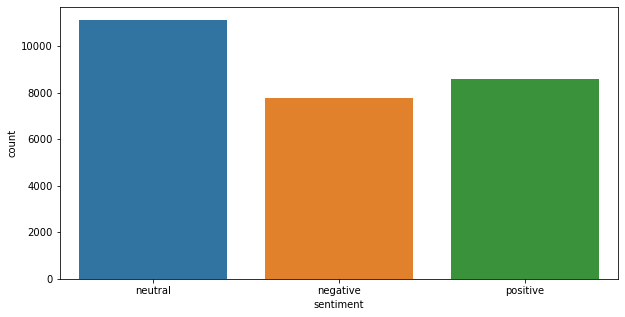

In [16]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'sentiment', data= train)

In [17]:
# let's draw Funnel chart for better visualization

fig =go.Figure(go.Funnelarea(text = temp.sentiment, values = temp.text, title = {'position':'top center', 'text':'Funnel-Chart Sentiment Distribution'}))
fig.show()

# Generating Meta-Features

more useful features to generate would be :-

Difference In Number Of words of Selected_text and Text
Jaccard Similarity Scores between text and Selected_text

In [18]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)

    return float(len(c)) / (len(a) + len(b) -len(c))

In [19]:
results_jaccard = []

for row in train.itertuples():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1, sentence2)
    results_jaccard.append([sentence1, sentence2, jaccard_score])
    


In [20]:
jacc = pd.DataFrame(results_jaccard, columns = ['text', 'selected_text', 'jaccard_score'])
jacc.head()

text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                         selected_text  jaccard_score  
0  I`d have responded, if I were going       1.000000  
1                             Sooo SAD       0.200000  
2                          bullying me       0.166667  
3                       leave me alone       0.600000  
4                        Sons of ****,       0.214286

In [21]:
train = train.merge(jacc, how =  'outer')

In [22]:
train.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  jaccard_score  
0  I`d have responded, if I were going   neutral       1.000000  
1                             Sooo SAD  negative       0.200000  
2                          bullying me  negative       0.166667  
3                       leave me alone  negative       0.600000  
4                        Sons of ****,  negative       0.214286

In [23]:
train['Num_words_ST'] = train['selected_text'].apply(lambda x: len(str(x).split()))
train['Num_word_text'] = train['text'].apply(lambda x: len(str(x).split()))
train['dff_in_words'] = train['Num_word_text'] - train['Num_words_ST']

In [24]:
train.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  jaccard_score  Num_words_ST  \
0  I`d have responded, if I were going   neutral       1.000000             7   
1                             Sooo SAD  negative       0.200000             2   
2                          bullying me  negative       0.166667             2   
3                       leave me alone  negative       0.600000             3   
4                        Sons of ****,  negative       0.214286             3   

   Num_word_text  dff_in_words  
0              7             0  
1             10             8  
2              5             3  
3              5             2  
4             14            11

In [25]:
### Let's look at the Distribution of Meta-Features

hist_data = [train['Num_words_ST'], train['Num_word_text']]
group_labels = ['Selected_Text', 'Text']
fig = ff.create_distplot(hist_data, group_labels, show_curve = False)
fig.update_layout(title_text = 'Dustribution of Number of words')
fig.update_layout(autosize = False, width = 900, height = 700, paper_bgcolor = 'LightSteelBlue')
fig.show()

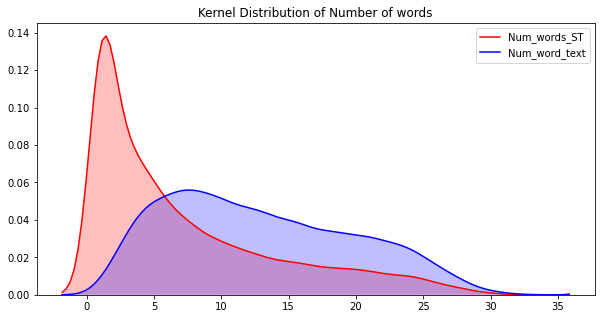

In [26]:
plt.figure(figsize = (10, 5))
p1 = sns.kdeplot(train['Num_words_ST'], shade=True, color = 'r').set_title('Kernel Distribution of Number of words')
p1 = sns.kdeplot(train['Num_word_text'], shade = True, color = 'b')

Let's see the plot between difference in number of words and jaccard_score across different Sentiments

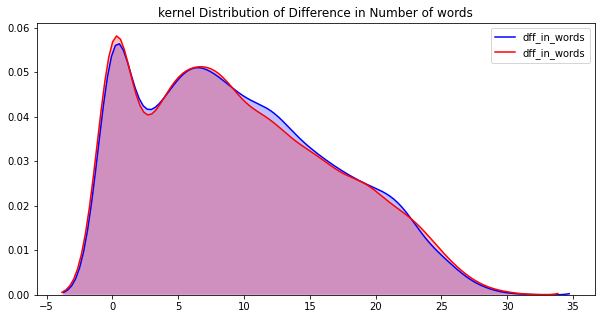

In [27]:
plt.figure(figsize=(10, 5))
p1 = sns.kdeplot(train[train['sentiment']== 'positive']['dff_in_words'], shade=True, color = 'b').set_title('kernel Distribution of Difference in Number of words')
p2 = sns.kdeplot(train[train['sentiment']== 'negative']['dff_in_words'], shade = True, color='r')

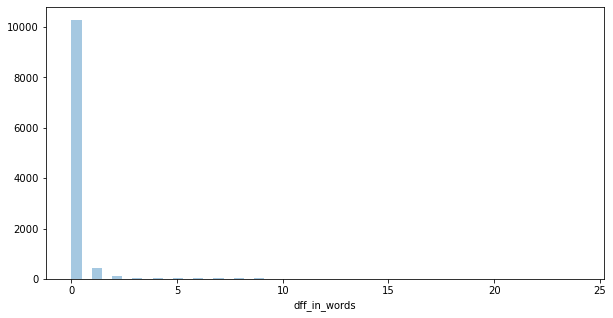

In [28]:
plt.figure(figsize=(10, 5))
sns.distplot(train[train['sentiment']== 'neutral']['dff_in_words'], kde=False)

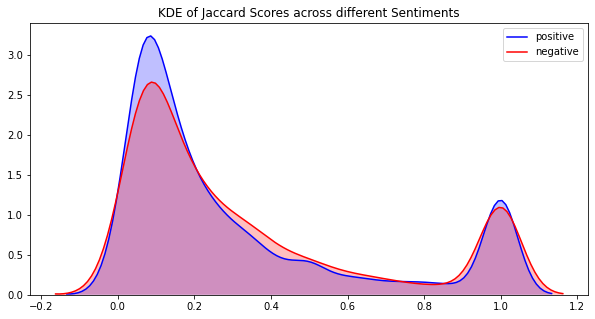

In [29]:
plt.figure(figsize=(10, 5))
p1 = sns.kdeplot(train[train['sentiment']== 'positive']['jaccard_score'], shade=True, color= 'b').set_title('KDE of Jaccard Scores across different Sentiments')
p1 = sns.kdeplot(train[train['sentiment']== 'negative']['jaccard_score'], shade=True, color = 'r')

plt.legend(labels=['positive', 'negative'])

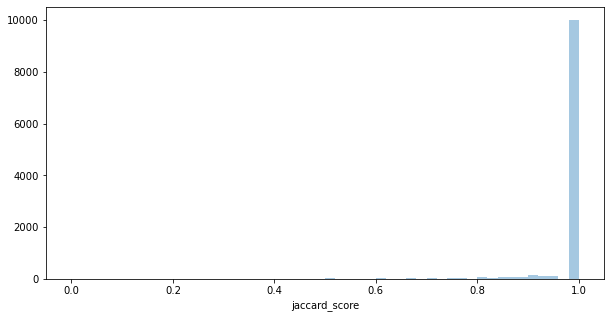

In [30]:
plt.figure(figsize=(10, 5))
sns.distplot(train[train['sentiment']=='neutral']['jaccard_score'], kde = False)

## Conclusion Of EDA

We can see from the jaccard score plot that there is peak for negative and positive plot around score of 1 .That means there is a cluster of tweets where there is a high similarity between text and selected texts ,if we can find those clusters then we can predict text for selected texts for those tweets irrespective of segment
Let's see if we can find those clusters,one interesting idea would be to check tweets which have number of words lesss than 3 in text, because there the text might be completely used as text

In [31]:
k = train[train['Num_word_text']<=2]

In [32]:
k.groupby('sentiment').count()['text']

sentiment
negative    108
neutral     413
positive    207
Name: text, dtype: int64

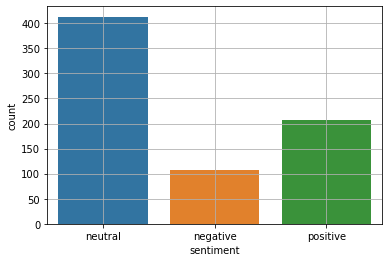

In [33]:
sns.countplot(x ='sentiment' , data = k )
plt.grid(True)


In [34]:
k.groupby('sentiment').mean()['jaccard_score']

sentiment
negative    0.788580
neutral     0.977805
positive    0.765700
Name: jaccard_score, dtype: float64

In [35]:
k[k['sentiment']== 'positive']

textID                              text  \
68     fa2654e730                          Chilliin   
80     bbbc46889b   THANK YYYYYYYYYOOOOOOOOOOUUUUU!   
170    f3d95b57b1                      good morning   
278    89d5b3f0b5                            Thanks   
429    a78ef3e0d0                       Goodmorning   
...           ...                               ...   
26689  e80c242d6a                        Goodnight;   
26725  aad244f37d                             *hug*   
26842  a46571fe12                         congrats!   
26959  49a942e9b1                   Happy birthday.   
27292  47c474aaf1                       Good choice   

                         selected_text sentiment  jaccard_score  Num_words_ST  \
68                            Chilliin  positive            1.0             1   
80     THANK YYYYYYYYYOOOOOOOOOOUUUUU!  positive            1.0             2   
170                       good morning  positive            1.0             2   
278                             Thanks  positive            1.0             1   
429                        Goodmorning  positive            1.0             1   
...                                ...       ...            ...           ...   
26689                       Goodnight;  positive            1.0             1   
26725                            *hug*  positive            1.0             1   
26842                        congrats!  positive            1.0             1   
26959                  Happy birthday.  positive            1.0             2   
27292                             Good  positive            0.5             1   

       Num_word_text  dff_in_words  
68                 1             0  
80                 2             0  
170                2             0  
278                1             0  
429                1             0  
...              ...           ...  
26689              1             0  
26725              1             0  
26842              1             0  
26959              2             0  
27292              2             1  

[207 rows x 8 columns]

## Cleaning the Corpus

In [36]:
def clean_text(text):
    ''' Make text lowercase, remove text in square brackets, remove links, remove punctuation and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
    

In [37]:
# Sample Cleaning check
print(train['text'][:9])

zoo = train['text'][:9].apply(lambda x: clean_text(x))
print(zoo)

0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
5    http://www.dothebouncy.com/smf - some shameles...
6    2am feedings for the baby are fun when he is a...
7                                           Soooo high
8                                          Both of you
Name: text, dtype: object
0                    id have responded if i were going
1           sooo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4     sons of  why couldnt they put them on the rel...
5      some shameless plugging for the best rangers...
6     feedings for the baby are fun when he is all ...
7                                           soooo high
8                                      

In [38]:
train['text'] = train['text'].apply(lambda x: clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x: clean_text(x))

In [39]:
train.head()

textID                                               text  \
0  cb774db0d1                  id have responded if i were going   
1  549e992a42         sooo sad i will miss you here in san diego   
2  088c60f138                             my boss is bullying me   
3  9642c003ef                      what interview leave me alone   
4  358bd9e861   sons of  why couldnt they put them on the rel...   

                       selected_text sentiment  jaccard_score  Num_words_ST  \
0  id have responded if i were going   neutral       1.000000             7   
1                           sooo sad  negative       0.200000             2   
2                        bullying me  negative       0.166667             2   
3                     leave me alone  negative       0.600000             3   
4                           sons of   negative       0.214286             3   

   Num_word_text  dff_in_words  
0              7             0  
1             10             8  
2              5             3  
3              5             2  
4             14            11

## Most common words in our Target - Selected Text

In [40]:
train['temp_list'] = train['selected_text'].apply(lambda x: str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist]) # Nice approach
temp = pd.DataFrame(top.most_common(20))   # The most_common() Function The Counter() function returns a dictionary which is unordered. You can                                               sort it according to the number of counts in each element using most_common() function of the                                                    Counter object.
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap = 'Blues')


In [41]:
fig = px.bar(temp, x = 'count', y = 'Common_words', title = 'Common Words in Selected Text', orientation='h', width = 700,  height =800, 
color = 'Common_words')
fig.show()

Oops!!! We cleasned the data but not removed the stop words. Let's remove them

In [42]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train['temp_list'] = train['temp_list'].apply(lambda x: remove_stopword(x))


In [43]:
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap = 'Purples')

In [44]:
# lets see the horizontal bar graph
fig = px.bar(temp, x='count', y = 'Common_words', orientation='h', title = 'Common words in Selected Text after removig stopwords', width = 700, height = 800, color='Common_words')
fig.show()

In [45]:
# Let's see the Tree map
fig = px.treemap(temp, path=['Common_words'], values='count', title = 'Treemap for most common in selected Text' )
fig.show()

## Most common words in Text

In [46]:
train['temp_list1'] = train['text'].apply(lambda x: str(x).split())
train['temp_list1'] = train['temp_list1'].apply(lambda x : remove_stopword(x))
top = Counter([item for sublist in train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:, :]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap = 'Greens')

In [47]:
fig = px.bar(temp, x = 'count', y = 'Common_words', title = 'Most common words in Text', height = 900, width= 800, orientation = 'h', color = 'Common_words')
fig.show()

In [48]:
fig = px.treemap(temp, path = ['Common_words'], values = 'count', title = 'TreeMap for most common words in Text')
fig.show()

In [49]:
# Most common words as per the Sentiment Wise

pos_sent = train[train['sentiment']=='positive']
neg_sent = train[train['sentiment']=='negative']
neu_sent = train[train['sentiment']=='neutral']

In [50]:
#MosT common positive words
top = Counter([item for sublist in pos_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [51]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [52]:
#MosT common negative words
top = Counter([item for sublist in neg_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [53]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [54]:
#MosT common Neutral words
top = Counter([item for sublist in neu_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [55]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [56]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

## Let's Look at Unique Words in each Segment

In [57]:
raw_data = [word for word_list in train['temp_list1'] for word in word_list]

In [75]:
def words_unique(sentiment, num_of_words, raw_text):
    '''Input - Provide the Segment and num of top words you need in provided Raw data
    Output - Unique segment words'''
    allother = []

    for item in train[train.sentiment != sentiment]['temp_list1']:
        for word in item:
            allother.append(word)

    allother = list(set(allother))

    specificonly = [x for x in raw_text if x not in allother]

    mycounter = Counter()

    for item in train[train.sentiment == sentiment]['temp_list1']:
        for word in item:
            mycounter[word] +=1

    keep = list(specificonly)

    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(num_of_words), columns=['words','count'])

    return Unique_words

In [76]:
## Positve Tweets

Unique_positives = words_unique('positive', 20, raw_data)
print('The top 20 unique words in Positive Tweets are :')
Unique_positives.style.background_gradient(cmap = 'Greens')

The top 20 unique words in Positive Tweets are :


In [78]:
fig = px.treemap(Unique_positives, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

In [80]:
## Negative Tweets

Unique_negatives = words_unique('negative', 20, raw_data)
print('The top 20 unique words in Negative Tweets are :')
Unique_negatives.style.background_gradient(cmap = 'Reds')

The top 20 unique words in Positive Tweets are :


In [81]:
fig = px.treemap(Unique_negatives, path=['words'], values='count',title='Tree Of Unique Negative Words')
fig.show()

In [82]:
## Neutral Tweets

Unique_neutral = words_unique('neutral', 20, raw_data)
print('The top 20 unique words in Neutral Tweets are :')
Unique_neutral.style.background_gradient(cmap = 'Purples')

The top 20 unique words in Neutral Tweets are :


In [83]:
fig = px.treemap(Unique_neutral, path=['words'], values='count',title='Tree Of Unique Neutral Words')
fig.show()

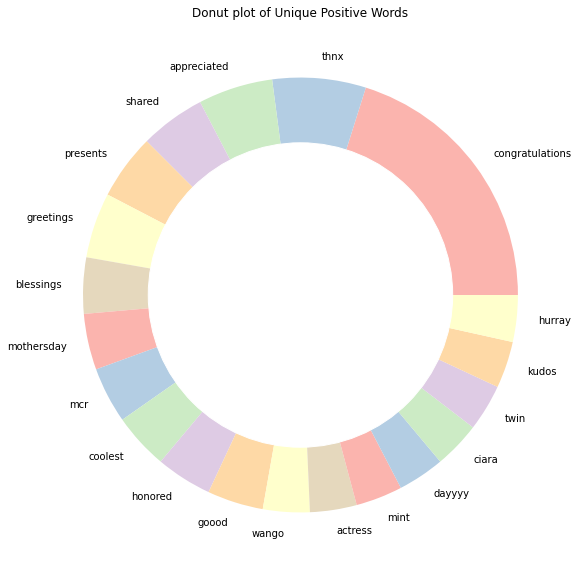

In [86]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16, 10))
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.pie(Unique_positives['count'], labels = Unique_positives.words, colors = Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Donut plot of Unique Positive Words')
plt.show()

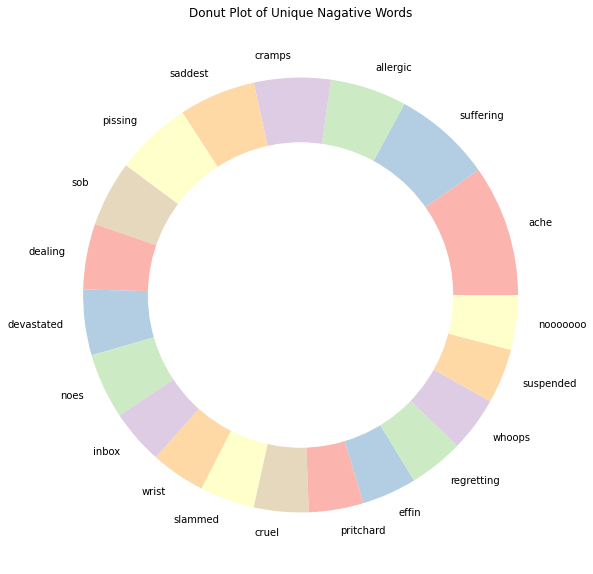

In [88]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16, 10))
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.pie(Unique_negatives['count'], labels = Unique_negatives.words, colors = Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Donut Plot of Unique Nagative Words')
plt.show()


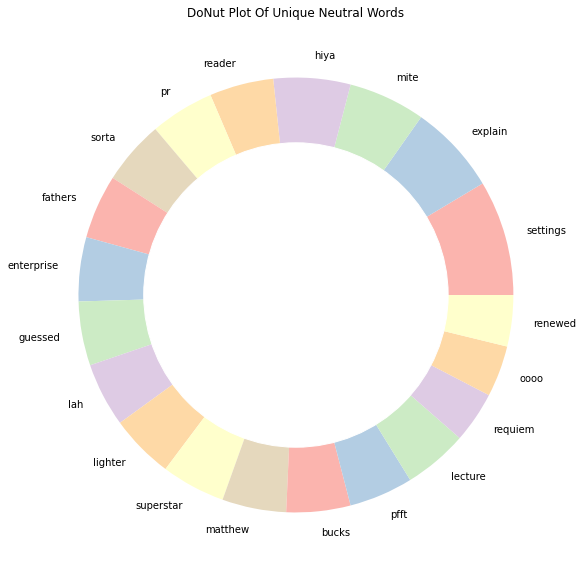

In [90]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_neutral['count'], labels=Unique_neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

By Looking at the Unique Words of each sentiment,we now have much more clarity about the data,these unique words are very strong determiners of Sentiment of tweets

It's Time For WordClouds
We will be building wordclouds in the following order:

WordCloud of Neutral Tweets 


WordCloud of Positive Tweets


WordCloud of Negative Tweets

In [119]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=200, figure_size=(18.0, 10.0), color='white', title=None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', 'im'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud =WordCloud(background_color=color,stopwords=stopwords,max_words=max_words,max_font_size=max_font_size,random_state=42,width=400,height=200, mask= mask)
    wordcloud.generate(str(text))

    plt.figure(figsize = figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation='bilinear');
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})

    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 'verticalalignment' : 'bottom'})

    plt.axis('off');
    plt.tight_layout()

d = (r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\\')



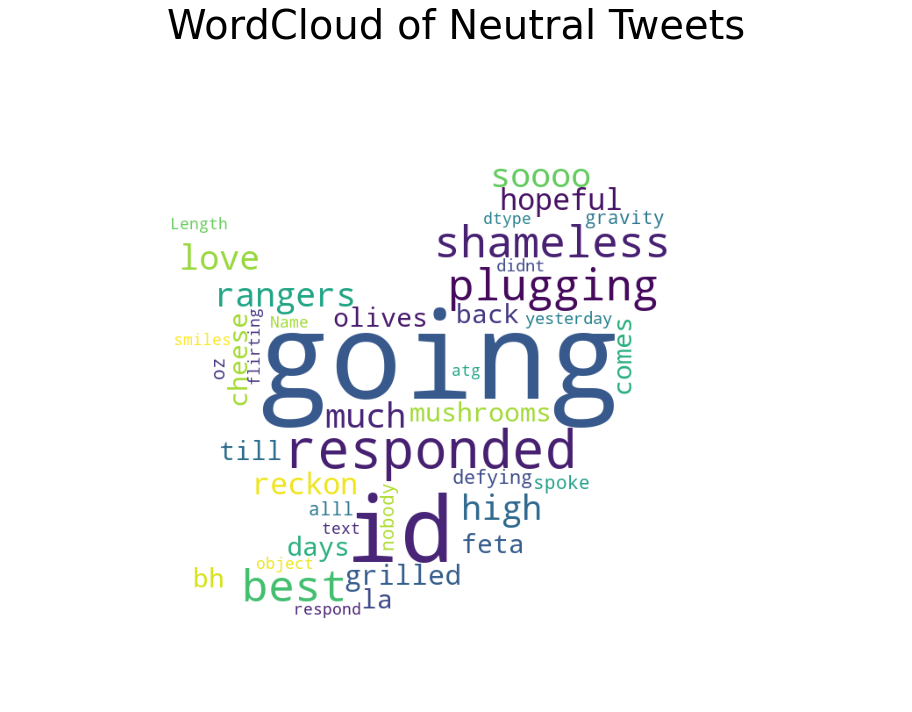

In [121]:
# WORDCLOUD OF NEUTRAL TWEETS
logo = 'Twitter_logo.png'
pos_mask = np.array(Image.open(d + logo))
plot_wordcloud(neu_sent.text, mask = pos_mask, color = 'white', max_font_size = 200, title = 'WordCloud of Neutral Tweets')

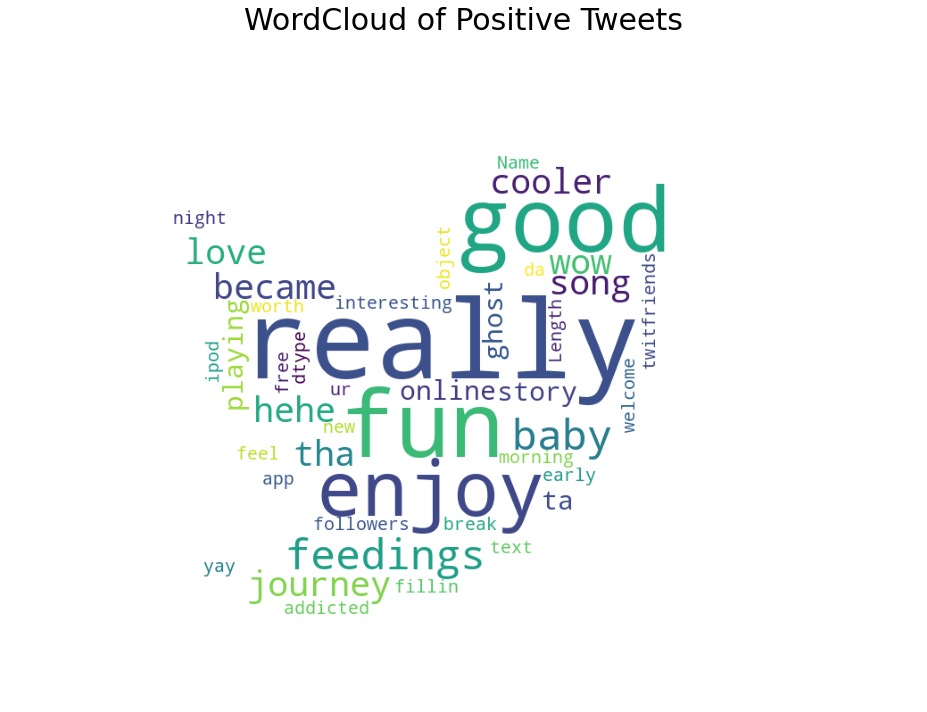

In [122]:
plot_wordcloud(pos_sent.text, mask = pos_mask, color = 'white', max_font_size = 200, title = 'WordCloud of Positive Tweets', title_size = 30)

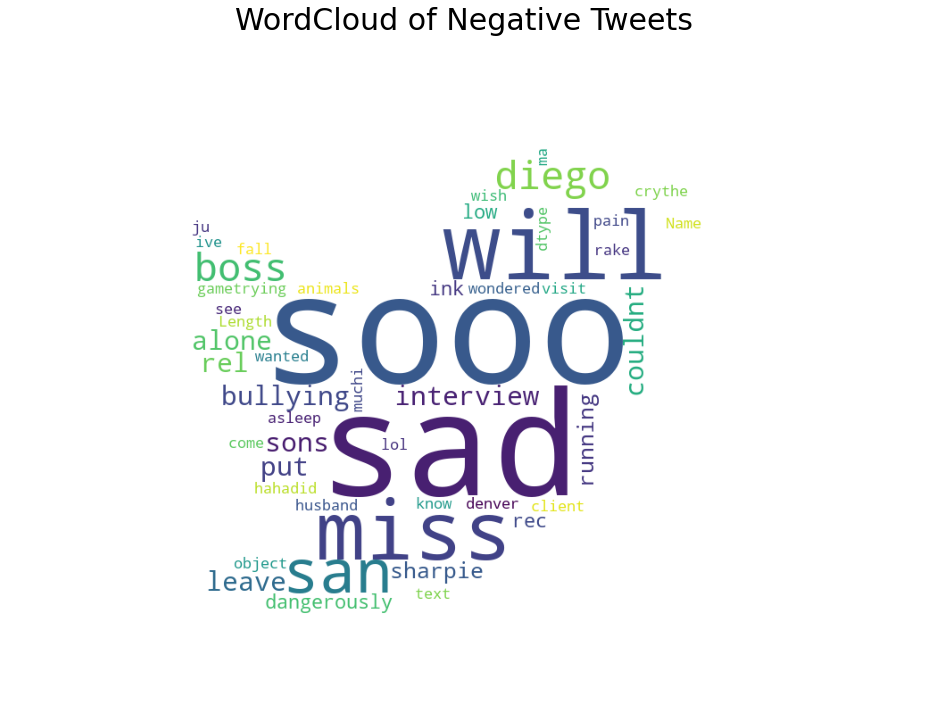

In [123]:
plot_wordcloud(neg_sent.text, mask = pos_mask, color = 'white', max_font_size = 200, title = 'WordCloud of Negative Tweets', title_size = 30)


## 1)Modelling the Problem as NER

In [124]:
df_train = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\train.csv')
df_test = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\test.csv')
df_submission = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\sample_submission.csv')


In [125]:
df_train['Num_words_text'] = df_train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main Text in train

In [126]:
df_train = df_train[df_train['Num_words_text']>=3]

In [143]:
def save_model(output_dir, nlp, new_model_name):
    '''This function Saves model to given output directory'''

    
    output_dir = r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Twitter Sentiment Analysis\tweet-sentiment-extraction\output'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [142]:
def get_model_out_path(sentiment):
    '''Returns Model output  path'''
    get_model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    return model_out_path


In [163]:
def get_training_data(sentiment):
    '''
    Returns Training data in the format needed to train spacy NER
    '''
    train_data = []
    for index , row in df_train.iterrows():
        if row.sentiment == sentiment:
            selected_text = row.selected_text
            text = row.text
            start = text.find(selected_text)
            end = start + len(selected_text)
            train_data.append((text, {'entities': [[start, end, 'selected_text']]}))

    return train_data


Training models for Positive and Negative tweets

In [165]:
sentiment = 'positive'

train_data = get_training_data(sentiment)
# train_data = pd.DataFrame(train_data)
model_path = get_model_out_path(sentiment)
# # For Demo Purposes I have taken 3 iterations you can train the model as you want
train( d,  model_path = None, n_iter=3, model=None)



In [166]:
sentiment = 'negative'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(train_data, model_path, n_iter=3, model=None)


## Predicting with the trained Model

In [161]:
def predict_entities(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    return selected_text

In [167]:
selected_texts = []
MODELS_BASE_PATH = '../input/tse-spacy-model/models/'

if MODELS_BASE_PATH is not None:
    print("Loading Models  from ", MODELS_BASE_PATH)
    model_pos = spacy.load(MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(MODELS_BASE_PATH + 'model_neg')
        
    for index, row in df_test.iterrows():
        text = row.text
        output_str = ""
        if row.sentiment == 'neutral' or len(text.split()) <= 2:
            selected_texts.append(text)
        elif row.sentiment == 'positive':
            selected_texts.append(predict_entities(text, model_pos))
        else:
            selected_texts.append(predict_entities(text, model_neg))
        
df_test['selected_text'] = selected_texts


In [ ]:
df_submission['selected_text'] = df_test['selected_text']
df_submission.to_csv("submission.csv", index=False)
display(df_submission.head(10))